In [1]:
import networkx as nx
import matplotlib.pyplot as plt

from src.algorithms.models.graph_manager import GraphManager
from src.algorithms.simulated_annealing import SimulatedAnnealing
from src.algorithms.tabu_search import TabuSearch

from src.utils.graph import generate_nx_graph


In [14]:
clm = GraphManager(
    node_list='./data/orders_with_depots.csv',
    max_cap=1000,
    vehicles=5
)

SA = SimulatedAnnealing(graph_manager=clm, epochs=35, attempts=35, 
                        initial_temp=1, cooling_rate=0.9)

In [15]:
solution = SA.optimize()
print(SA)

-----------Simulated Annealing Algorithm-----------
Current Temperature  : 0.05
Initial Temperature  : 1
Cooling Factor       : 0.9
Epochs               : 35
Attempts             : 35
Fleet size           : 5
Vehicle Capacity     : 1000
Total Locations      : 31
Total Depots         : 1
Initial Shortest     : 10299.89
Current Shortest     : 4942.279999999999
---------------------------------------------------


In [16]:
# print routes
print('Total distance covered:', solution.total_length)
fleet = SA.to_fleet()
for vehicle in fleet:
    print(f'Vehicle: {vehicle.number}')
    for route in vehicle.routes:
        print(route)

Total distance covered: 4942.279999999999
Vehicle: 001
<DoublyLinkedList (weight: 370, length: 242.88) Kraków -> Bielsko-Biała -> Zakopane -> Nowy Targ -> Kraków >
<DoublyLinkedList (weight: 70, length: 146.92) Kraków -> Tarnów -> Kraków >
Vehicle: 002
<DoublyLinkedList (weight: 840, length: 1267.1) Kraków -> Katowice -> Szklarska Poręba -> Szczecin -> Gromnik -> Poznań -> Wrocław -> Kraków >
<DoublyLinkedList (weight: 90, length: 24.98) Kraków -> Wieliczka -> Kraków >
Vehicle: 003
<DoublyLinkedList (weight: 880, length: 689.87) Kraków -> Krosno -> Rzeszów -> Sandomierz -> Zamość -> Lublin -> Puławy -> Kraków >
<DoublyLinkedList (weight: 230, length: 496.8) Kraków -> Kielce -> Łódź -> Gliwice -> Kraków >
Vehicle: 004
<DoublyLinkedList (weight: 700, length: 1073.87) Kraków -> Malbork -> Gdynia -> Gdańsk -> Olsztyn -> Kraków >
<DoublyLinkedList (weight: 400, length: 78.19) Kraków -> Chrzanów -> Kraków >
Vehicle: 005
<DoublyLinkedList (weight: 910, length: 921.67) Kraków -> Warszawa -> Kr

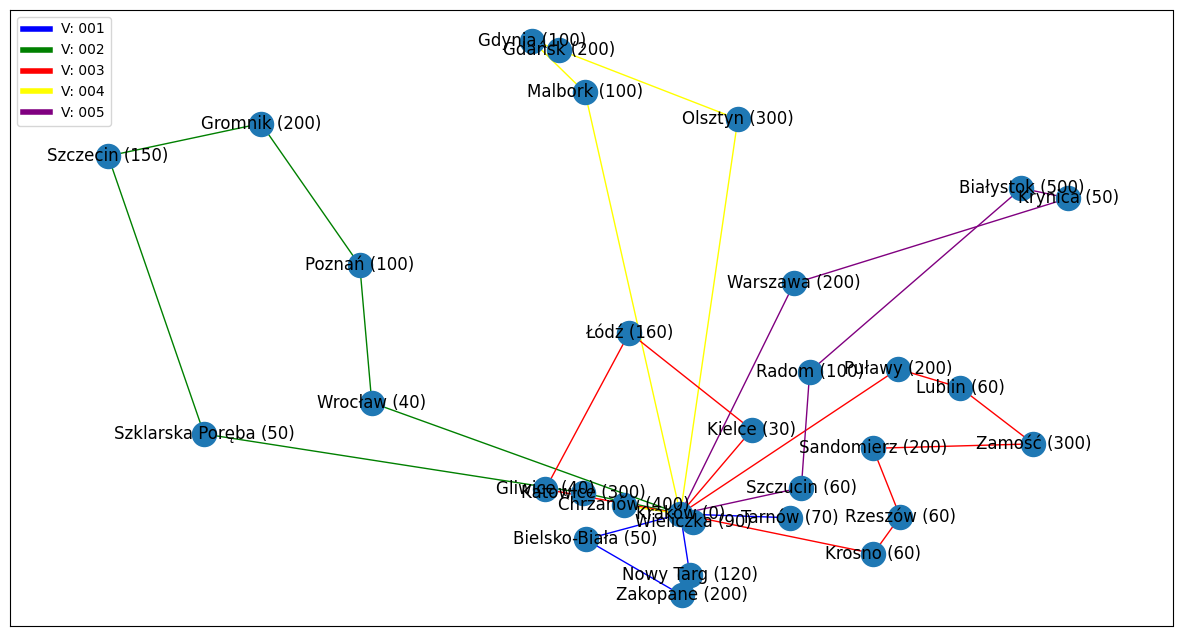

In [17]:
generate_nx_graph(fleet)

In [23]:
clm = GraphManager(
    node_list='./data/orders_with_depots.csv',
    max_cap=1000,
    vehicles=5
)

TS = TabuSearch(graph_manager=clm, max_iterations=1500, tabu_size=100)

In [24]:
solution_ts = TS.optimize()
print(TS)

---------------Tabu Search Algorithm---------------
Iterations           : 1500
Tabu List Size       : 100
Fleet size           : 5
Vehicle Capacity     : 1000
Total Locations      : 31
Total Depots         : 1
Initial Shortest     : 10299.89
Current Shortest     : 4859.5599999999995
---------------------------------------------------


In [25]:
# print routes
print('Total distance covered:', solution_ts.total_length)
fleet_ts = TS.to_fleet()
for vehicle in fleet_ts:
    print(f'Vehicle: {vehicle.number}')
    for route in vehicle.routes:
        print(route)

Total distance covered: 4859.5599999999995
Vehicle: 001
<DoublyLinkedList (weight: 650, length: 853.8) Kraków -> Krynica -> Białystok -> Radom -> Kraków >
<DoublyLinkedList (weight: 90, length: 24.98) Kraków -> Wieliczka -> Kraków >
Vehicle: 002
<DoublyLinkedList (weight: 900, length: 1090.37) Kraków -> Malbork -> Gdańsk -> Gdynia -> Olsztyn -> Warszawa -> Kraków >
<DoublyLinkedList (weight: 120, length: 128.02) Kraków -> Nowy Targ -> Kraków >
Vehicle: 003
<DoublyLinkedList (weight: 880, length: 647.99) Kraków -> Krosno -> Rzeszów -> Zamość -> Lublin -> Puławy -> Sandomierz -> Kraków >
<DoublyLinkedList (weight: 130, length: 191.49) Kraków -> Szczucin -> Tarnów -> Kraków >
Vehicle: 004
<DoublyLinkedList (weight: 630, length: 1283.35) Kraków -> Poznań -> Gromnik -> Szczecin -> Szklarska Poręba -> Wrocław -> Gliwice -> Bielsko-Biała -> Kraków >
<DoublyLinkedList (weight: 200, length: 170.15) Kraków -> Zakopane -> Kraków >
Vehicle: 005
<DoublyLinkedList (weight: 890, length: 469.41) Krakó

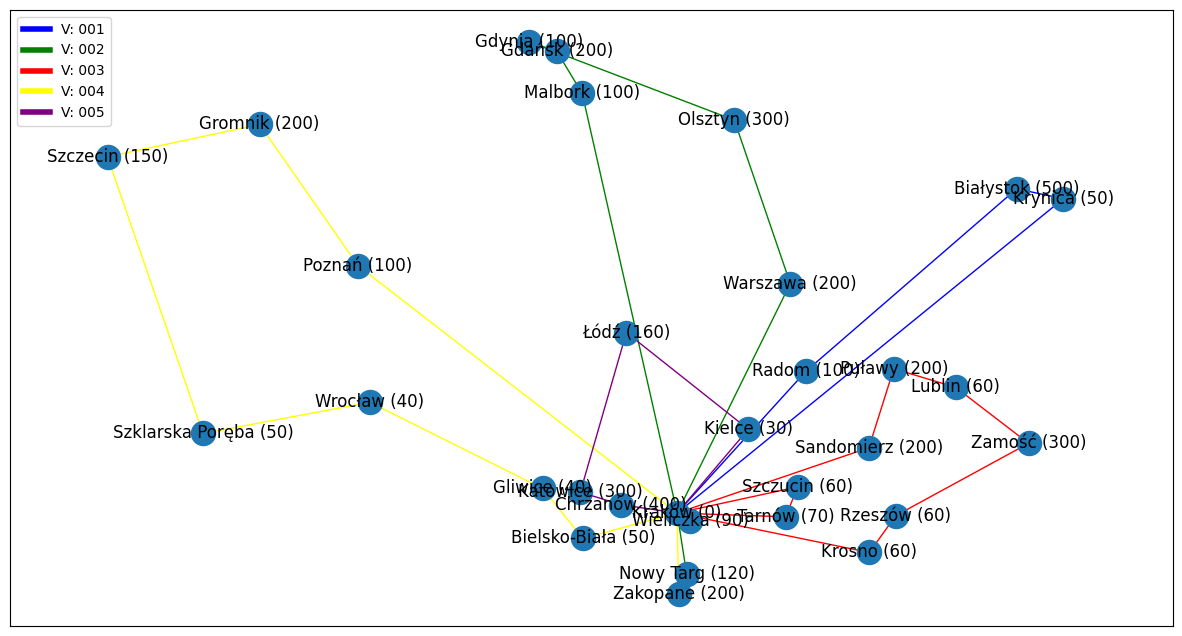

In [26]:
generate_nx_graph(fleet_ts)